In [1]:
## Rocket Python With Control Surfaces 
#### Enviroment Set Up

In [2]:
%reset
from rocketpy import *

Env = Environment(
    railLength=5.2, latitude=32.990254, longitude=-106.974998, elevation=1400
)
import datetime
#tomorrow = datetime.date.today() + datetime.timedelta(days=1)
#Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12))  # Hour given in UTC time
URL = "http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779"
Env.setAtmosphericModel(type="WyomingSounding", file=URL)
#Env.setAtmosphericModel(type="Reanalysis", file="/data/weather/")
#Env.info()

#### Motor Setup


Motor Details
Total Burning Time: 1.65 s
Total Propellant Mass: 0.028 kg
Propellant Exhaust Velocity: 596.607 m/s
Average Thrust: 10.206 N
Maximum Thrust: 29.73 N at 0.282 s after ignition.
Total Impulse: 16.839 Ns

Plots


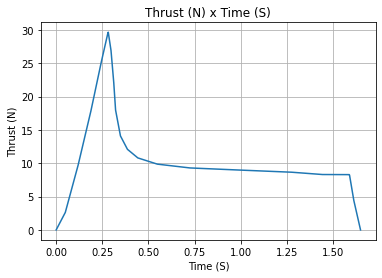

In [3]:

ESTESD12 = SolidMotor(
    #thrustSource="../../data/motors/Cesaroni_M1670.eng",
    thrustSource="data/motors/Estes_D12.eng",
    burnOut=1.7,
    grainNumber=1,
    grainDensity=1815,
    grainOuterRadius=18 / 1000,
    grainInitialInnerRadius=15 / 1000,
    grainInitialHeight=50 / 1000,
)

ESTESD12.info()


#### Rocket Setup

Inertia Details
Rocket Dry Mass: 0.232 kg (No Propellant)
Rocket Total Mass: 0.2602248537980141 kg (With Propellant)

Geometrical Parameters
Rocket Radius: 0.02 m

Aerodynamics Stability
Initial Static Margin: 2.655 c
Final Static Margin: 3.002 c

Aerodynamics Plots


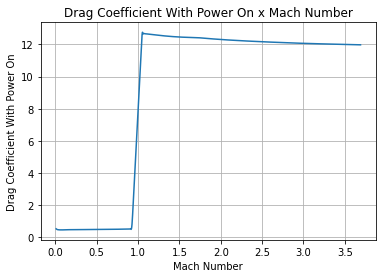

In [4]:
SUBSCALE = Rocket(
    motor=ESTESD12,
    radius=40 / 2000,
    mass=0.232,
    inertiaI=0.0025,
    inertiaZ=0.000277,
    distanceRocketNozzle=-0.128,
    distanceRocketPropellant=-0.128,
    powerOffDrag="data/proxima/subscale_finless_OFF.csv",
    powerOnDrag="data/proxima/subscale_finless_ON.csv",
)

SUBSCALE.setRailButtons([0.01, -0.028])

NoseCone = SUBSCALE.addNose(length=10/1000, kind="OGIVE", distanceToCM=17.2/100)

FinSet = SUBSCALE.addFins(
    4, span=5/100, rootChord=8/100, tipChord=3/100, distanceToCM=-.129
)
SUBSCALE.info()

#### Flight Data

0.5102081432920537
0.5442004282671339
0.5442004282671339
0.5442004282671339
0.5187062145358237
0.5187062145358237
0.5187062145358237
0.5123326611029961
0.5123326611029961
0.5105193756669755
0.5105193756669755
0.5108306080418973
0.5108306080418973
0.5114530727917409
0.5114530727917409
0.5120755375415845
0.5120755375415845
0.5126980022914281
0.5126980022914281
0.5189226497898645
0.5189226497898645
0.5251472972883008
0.5251472972883008
0.5313719447867371
0.5313719447867371
0.5375965922851734
0.5375965922851734
0.5510017269753845
0.5510017269753845
0.5644068616655956
0.5644068616655956
0.5778119963558067
0.5778119963558067
0.5912171310460178
0.5912171310460178
0.6046222657362289
0.6046222657362289
0.6206428482663013
0.6206428482663013
0.6366634307963738
0.6366634307963738
0.6526840133264462
0.6526840133264462
0.6687045958565186
0.6687045958565186
0.6847251783865911
0.6847251783865911
0.7007457609166635
0.7007457609166635
0.7104644523701135
0.7104644523701135
0.7201831438235634
0.7201831438

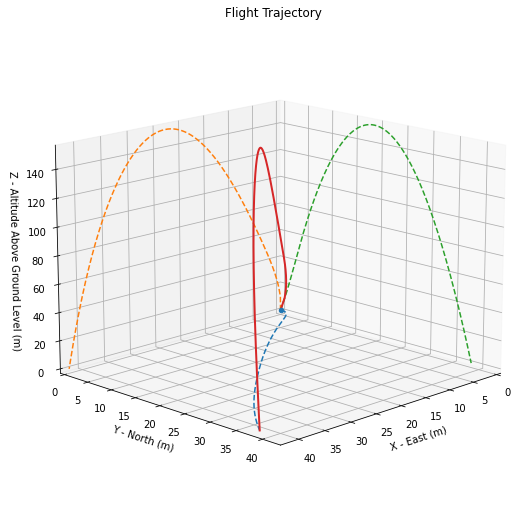



Fin Data

t =  [ 0.51020814  0.54420043  0.54420043 ... 11.99096332 11.99492685
 11.99531998] | error = [ 4.03249052e-22  3.39073107e-22  1.74684637e-22 ...  1.63437497e-30
 -8.68699069e-28 -9.62121136e-28]


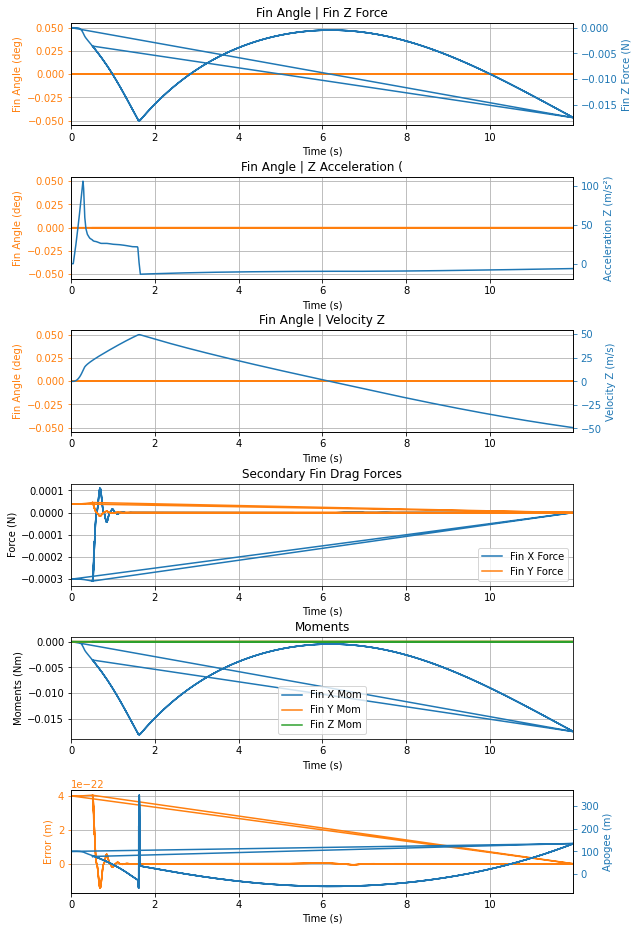



Trajectory Force Plots



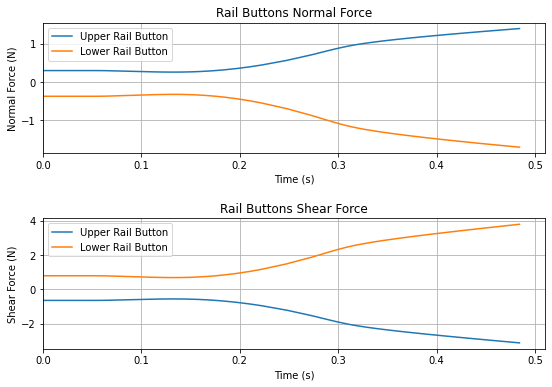

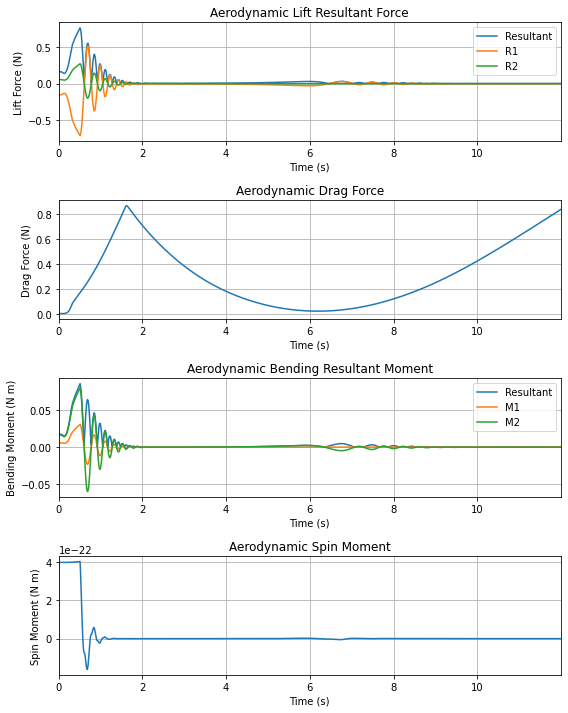



Trajectory Kinematic Plots



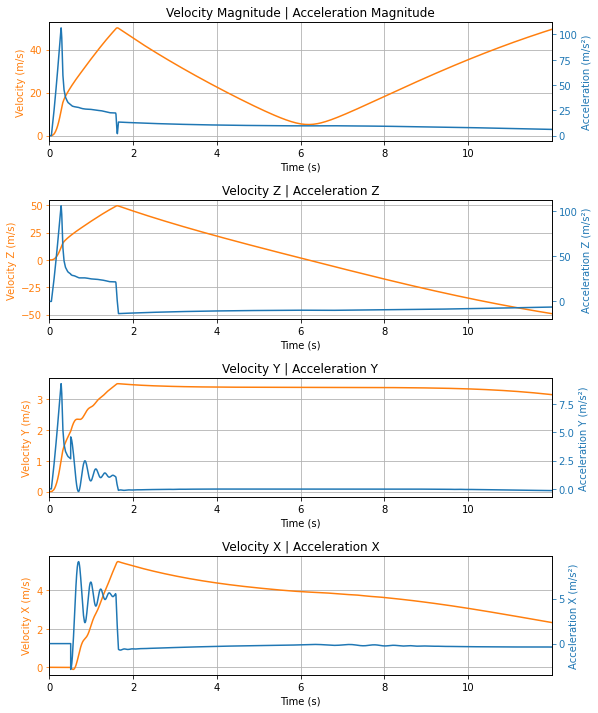



Angular Position Plots



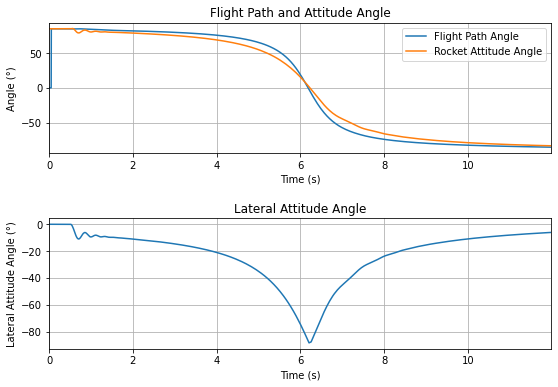



Path, Attitude and Lateral Attitude Angle plots



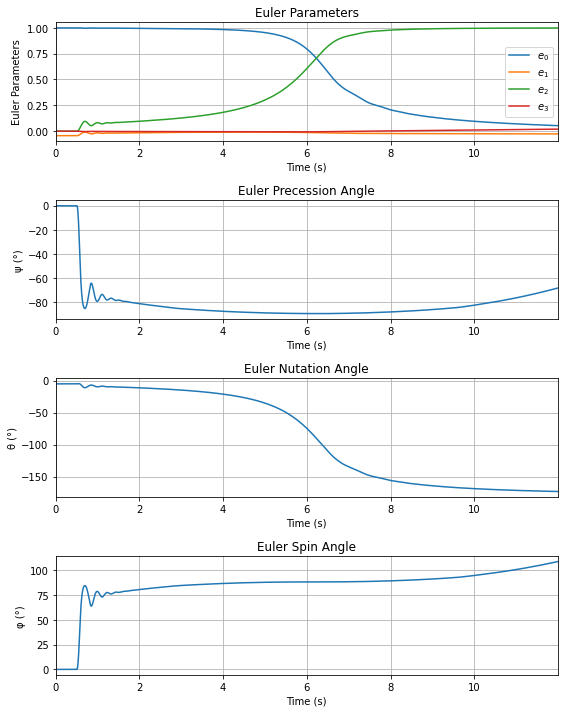



Trajectory Angular Velocity and Acceleration Plots



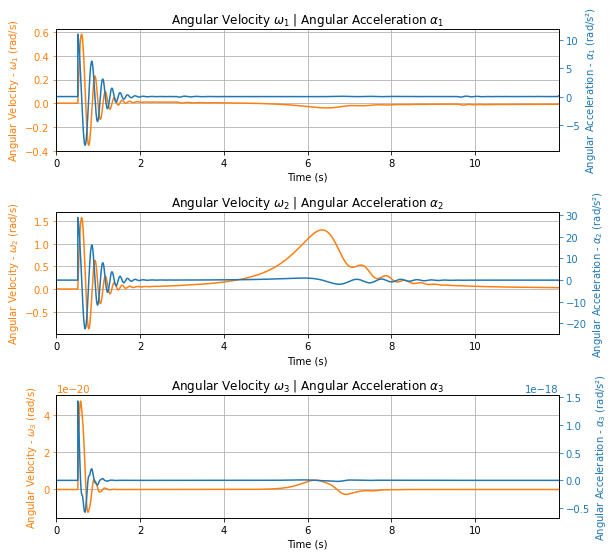



Trajectory Energy Plots



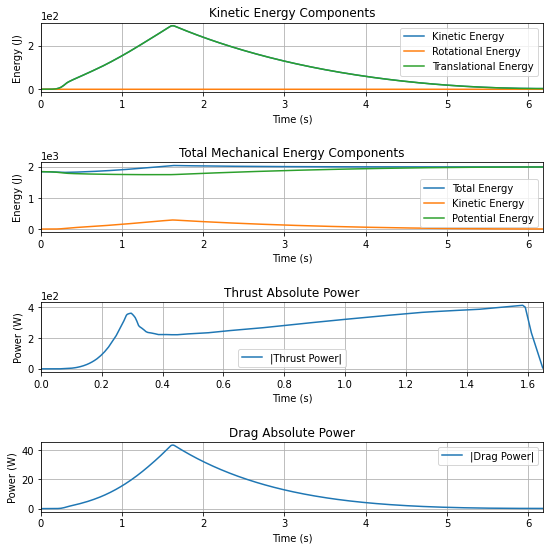



Trajectory Fluid Mechanics Plots



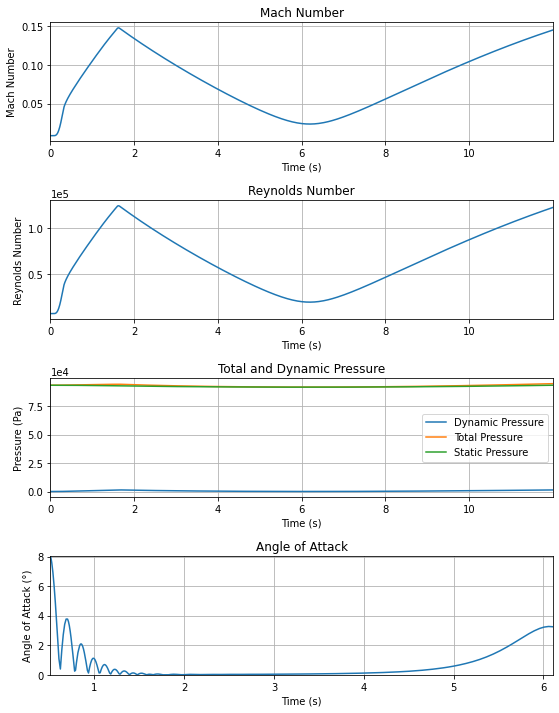



Trajectory Stability and Control Plots



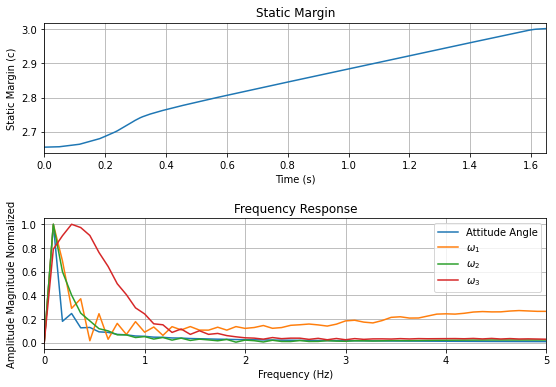

In [5]:
TestFlight = Flight(rocket=SUBSCALE, environment=Env, inclination=85, heading=0, visualiseRocket=False)
#TestFlight.visualise()
TestFlight.allInfo()